<a href="https://colab.research.google.com/github/ssp22/485Design-Project/blob/master/Python%20%2B%20Derivations/mass_balance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [0]:
# Define parameters
dP = 40 # bar
dPi = 5.7 # bar
A = 909000 # cm^2 # membrane area
R = 0.1 # at 40 bar, 5C
k_w = 1.25 * 10 ** (-5) # g / (cm^2 s bar)
diff_P = dP - dPi
X = 0.01 # split ratio
# J_P_ref = 3 * 10 ** (-4) # g / cm^2 s 

# Initial conditions
m_0 = 1815000 # g # initial batch feed
C_Et0 = 0.0395 # weight percent
M_f = 1400 # g / s # flow out of tank


def dCdt2(C_Et,t):
    # Define flow rates
    M_p1 = A * k_w * diff_P * (1 + C_Et * (1-R)) # 
    # M_p1 = A * J_P_ref
    M_r1 = M_f - M_p1
    if (M_r1 < 0):
      return 0
    C_r1 = (M_f * C_Et - M_p1 * (1-R) * C_Et) / M_r1
    M_p2 = A * k_w * diff_P * (1 + C_r1 * (1-R))
    # M_p2 = A * J_P_ref
    M_r2 = (1-X) * M_r1 - M_p2
    if (M_r2 < 0):
      return 0
    C_r2 = ((1-X)*M_r1*C_r1 - M_p2 * (1-R) * C_r1) / M_r2
    dCdt = (M_r1 * X * C_r1 + M_r2 * C_r2 - M_f * C_Et) / m_0
    M_water = M_p1 + M_p2
    return dCdt

t = np.arange(0,10000,1)

# solve ODE
C = odeint(dCdt2,C_Et0,t)

# redefine stream variables outside the ODE
M_p1 = A * k_w * diff_P * (1 + C * (1-R)) # 
M_p1water = A * k_w * diff_P
M_p1ethanol = M_p1-M_p1water
M_r1 = M_f - M_p1
C_r1 = (M_f * C - M_p1 * (1-R) * C) / M_r1
M_p2 = A * k_w * diff_P * (1 + C_r1 * (1-R))
M_p2water = A * k_w * diff_P
M_p2ethanol = M_p2-M_p2water
M_r2 = (1-X) * M_r1 - M_p2
C_r2 = ((1-X)*M_r1*C_r1 - M_p2 * (1-R) * C_r1) / M_r2
M_water = M_p1 + M_p2

In [8]:
# For stream table
count = 0
val= 10
while (val >= 0.00395):
  val = C[count]
  count += 1
if (val <= 0.00395):
  Total = 365*20*3600/t[count]*m_0
  # print('total product= ', Total,' g')
  BPY = Total / (29.8 * 3968)
print('Product in BPY = ',BPY)
print('time for a batch = ',t[count],'s')
print('initial mass flow rates (g/s): ',M_r1[0],M_r2[0],M_p1[0],M_p2[0],M_water[0])
print('endpoint mass flow rates (g/s): ',M_r1[count],M_r2[count],M_p1[count],M_p2[count],M_water[count])
print('t = 0: permeate 1 water = ',M_p1water)
print('t = 0: permeate 1 ethanol = ',M_p1ethanol[0])
print('t = 0: permeate 2 water = ',M_p2water)
print('t = 0: permeate 2 ethanol = ',M_p2ethanol[0])
print('t = final: permeate 1 water = ',M_p1water)
print('t = final: permeate 1 ethanol = ',M_p1ethanol[count])
print('t = final: permeate 2 water = ',M_p2water)
print('t = final: permeate 2 ethanol = ',M_p2ethanol[count])
print('final mass fraction of ethanol: ',C[count])

Product in BPY =  69994.74619859419
time for a batch =  5763 s
initial mass flow rates (g/s):  [996.41121519] [582.29713058] [403.58878481] [404.14997246] [807.73875727]
endpoint mass flow rates (g/s):  [1008.88170427] [607.62091611] [391.11829573] [391.17197112] [782.29026685]
t = 0: permeate 1 water =  389.73375
t = 0: permeate 1 ethanol =  [13.85503481]
t = 0: permeate 2 water =  389.73375
t = 0: permeate 2 ethanol =  [14.41622246]
t = final: permeate 1 water =  389.73375
t = final: permeate 1 ethanol =  [1.38454573]
t = final: permeate 2 water =  389.73375
t = final: permeate 2 ethanol =  [1.43822112]
final mass fraction of ethanol:  [0.00394727]


In [5]:
print('Pump 2:')
print('Initial pressure drop = ',diff_P+dPi*(M_f/M_r1[0]),' bar')
print('Final pressure drop = ',diff_P+dPi*(M_f/M_r1[count]),' bar')

Pump 2:
Initial pressure drop =  [42.30874165]  bar
Final pressure drop =  [42.20974796]  bar


In [0]:
# Permeate / feeding water rate by avg-int
a = M_water[:count]
b = t[:count]
avg_p = np.trapz(a,b,axis=0) / count
avg_r1 = np.trapz(M_r1[:count],b,axis=0) / count
avg_r2 = np.trapz(M_r2[:count],b,axis=0) / count
avg_C = np.trapz(C[:count],b,axis=0) / count
avg_Cr1 = np.trapz(C_r1[:count],b,axis=0) / count
avg_Cr2 = np.trapz(C_r2[:count],b,axis=0) / count
print('Average permeate = feed water = ',avg_p,' g/s')
# print('Average retentate 1 = ',avg_r1, ' g/s with a concentration of ',avg_Cr1)
# print('Average retentate 2 = ',avg_r2, ' g/s with a concentration of ',avg_Cr2)
print('Pump 1:')
print('Flow rate = ',M_f,' g/s')
print('Pressure drop = ',dP,' bar')
print('S1 conc = ',avg_C)
print('Pump 2:')
print('Flow rate = ',avg_r1*(1-X),' g/s')
print('Pressure drop = ',diff_P+dPi*(M_f/avg_r1),' bar')
print('S2 conc = ',avg_Cr1)

Average permeate = feed water =  [691.16701476]  g/s
Pump 1:
Flow rate =  1500  g/s
Pressure drop =  40  bar
S1 conc =  [0.01534761]
Pump 2:
Flow rate =  [1142.71639872]  g/s
Pressure drop =  [41.70734972]  bar
S2 conc =  [0.01581037]


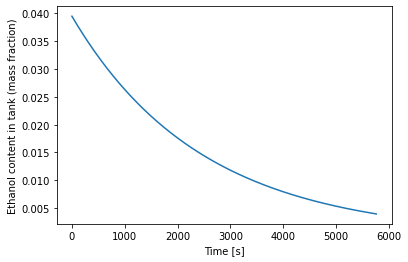

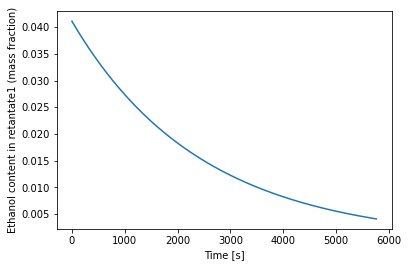

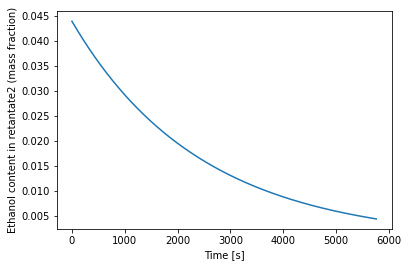

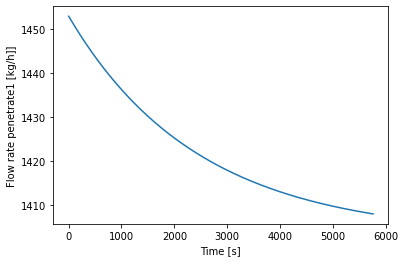

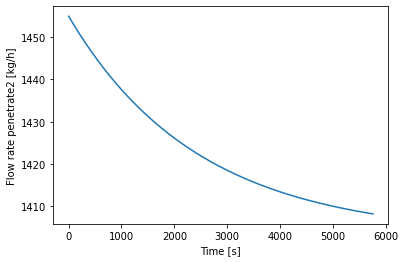

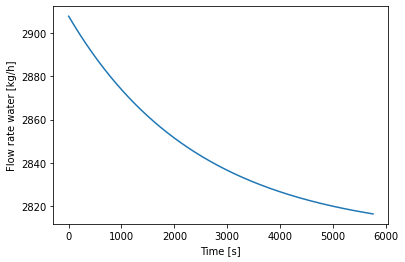

In [11]:
# plot results
plt.plot(t[:count],C[:count])
plt.xlabel('Time [s]')
plt.ylabel('Ethanol content in tank (mass fraction)')
plt.show()

plt.plot(t[:count],C_r1[:count])
plt.xlabel('Time [s]')
plt.ylabel('Ethanol content in retantate1 (mass fraction)')
plt.show()

plt.plot(t[:count],C_r2[:count])
plt.xlabel('Time [s]')
plt.ylabel('Ethanol content in retantate2 (mass fraction)')
plt.show()

plt.plot(t[:count],M_p1[:count]*3.6)
plt.xlabel('Time [s]')
plt.ylabel('Flow rate penetrate1 [kg/h]]')
plt.show()

plt.plot(t[:count],M_p2[:count]*3.6)
plt.xlabel('Time [s]')
plt.ylabel('Flow rate penetrate2 [kg/h]')
plt.show()

plt.plot(t[:count],M_water[:count]*3.6)
plt.xlabel('Time [s]')
plt.ylabel('Flow rate water [kg/h]')
plt.show()